# Продолжение по задачам регрессии. Метрики

На прошлой паре мы изучили как работает полиномиальной регрессии

А сейчас давайте немного поговорим про оценку точности нашего обученного алгоритма

## Средняя квадратическая ошибка (MSE)


Ранее, в регрессии, которую мы писали (на чистом Python), мы использовали данный метод

Это, один из самый простых и распространенный показатель для оценки регрессии. Определяется уравнением $MSE={{1}\over{N}}{\sum\limits_{i=1}^N}(y_{i} - y'_{i})^2$

MSE в основном измеряет среднеквадратичную ошибку наших прогнозов. Для каждой точки вычисляется квадратная разница между целевыми значениями функции и прогнозируемыми значениям, а затем усредняются эти значения.

Чем выше это значение, тем хуже модель.
Он никогда не бывает отрицательным, поскольку мы возводим в квадрат, но для идеальной модели это будет ноль.




**Достоинства:**

*   Каждая ошибка имеет свой вес, и большие расхождения более заметны за счет
возведения в степень. Способ ее расчета позволяет усиливать штраф за большие расхождения в прогнозах.

**Недостатки:**

*   Менее удобна для понимания, потому что измеряется в квадратных единицах. Не поможет, если нужно сравнить две модели, предсказывающие одно и тоже по разным признакам

*   Если мы сделаем один очень плохой прогноз, возведение в квадрат сделает ошибку еще хуже, и это может исказить метрику в сторону переоценки плохости модели. Это особенно проблематичное поведение, если у нас есть зашумленные данные (то есть данные, которые по какой-либо причине не совсем надежны) - даже в «идеальной» модели может быть высокий MSE в этой ситуации, поэтому становится трудно судить, насколько хорошо модель выполняет. С другой стороны, если все ошибки малы или, скорее, меньше 1, то ощущается противоположный эффект: мы можем недооценивать недостатки модели.





---



## Среднеквадратическая ошибка (RMSE)


**RMSE** - это квадратный корень из **MSE**. Квадратный корень введен, чтобы масштаб ошибок был таким же, как масштаб целей.

Определяется уравнением $RMSE=\sqrt{{{1}\over{N}}{\sum\limits_{i=1}^N}(y_{i} - y'_{i})^2}=\sqrt{MSE}$



**Достоинства:**

*   Имеет те же преимущества, что и **MSE**, но более удобна для понимания — погрешность измеряется в тех же единицах, что и значение прогнозирования

**Недостатки:**

*   Менее удобна для понимания, потому что измеряется в квадратных единицах. Не поможет, если нужно сравнить две модели, предсказывающие одно и тоже по разным признакам

*   Если мы сделаем один очень плохой прогноз, возведение в квадрат сделает ошибку еще хуже, и это может исказить метрику в сторону переоценки плохости модели. Это особенно проблематичное поведение, если у нас есть зашумленные данные (то есть данные, которые по какой-либо причине не совсем надежны) - даже в «идеальной» модели может быть высокий MSE в этой ситуации, поэтому становится трудно судить, насколько хорошо модель выполняет. С другой стороны, если все ошибки малы или, скорее, меньше 1, то ощущается противоположный эффект: мы можем недооценивать недостатки модели.





---



## Средняя абсолютная ошибка (MAE)


В **MAE** ошибка рассчитывается как среднее абсолютных разностей между целевыми значениями функции и прогнозируемыми значениям.

Помогает оценить абсолютную ошибку — то, насколько число о прогнозах тех же единицах, что и разошлось с реальным числом

Определяется уравнением $MAE={{1}\over{N}}{\sum\limits_{i=1}^N}|y_{i} - y'_{i}|$


**MAE** - это линейная оценка, которая означает, что все индивидуальные различия взвешены одинаково  средним. Например, разница между 10 и 0 будет вдвое больше разницы между 5 и 0. 

**MAE** широко используется в финансах, где ошибка в 10 долларов обычно в два раза хуже, чем ошибка в 5 долларов. С другой стороны, метрика **MSE** считает, что ошибка в 10 долларов в четыре раза хуже, чем ошибка в 5 долларов. **MAE** легче обосновать, чем **MSE**.


**Достоинства:**

*   Удобно анализировать — погрешность измеряется в тех же значениях, что и целевые значения.


**Недостатки:**

*    Одинаково оштрафует алгоритм за расхождение — Например, в 2 и 200 единиц. Не поможет, если нужно будет сравнить две модели, предсказывающие одно и то же по разным признакам.





---



## R в квадрате (R²)


Коэффициент детерминации, или **R²** (иногда читаемый как R-два), является еще одним показателем, который мы можем использовать для оценки модели, и он тесно связан с MSE, но имеет преимущество в том, что не имеет значения, являются ли выходные значения очень большими или очень маленькими, **R²** всегда будет между -∞ и 1.

**Этот метод мы использовали, когда писали регрессию через библиотеку Sklearn**


Определяется уравнением $R^2=1-{{MSE(model)}\over{MSE(baseline)}}$

**MSE**(model) - это средняя квадратическая ошибка модели ( считается так же, кам мы и описывали ранее )

**MSE**(baseline) - это средняя квадратическая ошибка базовой линии определяется как: $MSE={{1}\over{N}}{\sum\limits_{i=1}^N}(y_{i} - y'_{ср})^2$,  где $ y'_{ср}$  - это среднее значение среди всех прогнозируемых значений (скаляр)

В заключение, **R²** - это соотношение между тем, насколько хороша наша модель, и тем, насколько хороша модель наивного среднего.

Чем ближе значение к 1, тем точнее модель.
Когда **R²** отрицательно, это означает, что модель хуже, чем предсказание среднего значения. Потому точность в данном случае от 0 до 1 можно воспринимать, как от 0 до 100 кол-ва данных, сколько модель смогла объяснить

**Достоинства:**

*   С ней легко объяснить качество модели (если результат прогнозов от 0.5 (50%) и выше, то значит - все хорошо)


**Недостатки:**

*    Одинаково оштрафует алгоритм за расхождение — Например, в 2 и 200 единиц. Не поможет, если нужно будет сравнить две модели, предсказывающие одно и то же по разным признакам.





---



## Вспомним нашу задачу:

Представим, что мы внезапно очутились в Америке. И мы не знаем, как переводить из градусов по шкале Цельсия в градусы по шкале Фаренгейта (Нам очень это нужно, т.к. мы работаем продавцом мороженного, нам надо знать, в какие дни будет больший ажиотаж и мы привыкли к шкале Цельсия) Мы не знаем формулы перевода, но у нас есть сосед, который подсказываем нам температуру и в Цельсиях и в Фаренгейтах, но он не приходит каждый день... Нам надо научить компьютер переводить из Цельсия в Фаренгейты (Имея лишь готовые пары температур в Цельсии и в Фаренгейтах)

На ввод поступает температура в шкале Фаренгейта

На выходе выводится температура в шкале Цельсия

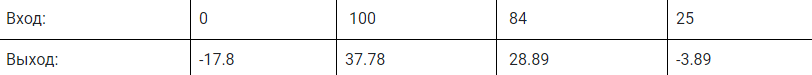



Итоговая формула

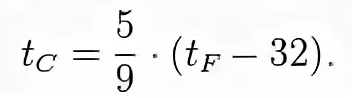

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([0,100,84,25]).reshape((-1, 1))
Y = np.array([-17.8,37.78,28.89,-3.89])

model = LinearRegression() #берем нашу модель
model.fit(X, Y) # обучаем нашу модель
accuracy = model.score(X, Y)

print('Предсказание:', model.predict(X))
print('Точность модели в R^2:', accuracy)

Предсказание: [-17.8   37.78  28.89  -3.89]
Точность модели в R^2: 0.9999999336737742


По умолчанию в sklearn.linear_model, когда мы вызываем метод score, используется метрика, $R^2$

Если же мы хотим измерить точность в других метриках, то мы можем сделать так:

In [ ]:
import sklearn.metrics as metrics #импортируем метрики

y_true = Y
y_pred= model.predict(X)

print("Средняя квадратическая ошибка (MSE):", metrics.mean_squared_error(y_true, y_pred, squared=True))
print("Среднеквадратическая ошибка (RMSE):", metrics.mean_squared_error(y_true, y_pred, squared=False))
print("Средняя абсолютная ошибка (MAE):", metrics.mean_absolute_error(y_true, y_pred))
print("R^2:", metrics.r2_score(y_true, y_pred))

MSE: 3.462448692822197e-05
RMSE: 0.0058842575511462766
MAE: 0.004630403431567065
R^2: 0.9999999336737742
